/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.3418 - loss: 1.0971 - val_accuracy: 0.5000 - val_loss: 1.0888
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8378 - loss: 1.0769 - val_accuracy: 0.9375 - val_loss: 1.0533
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9113 - loss: 1.0433 - val_accuracy: 0.9375 - val_loss: 0.9916
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8698 - loss: 0.9819 - val_accuracy: 0.9375 - val_loss: 0.8814
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8567 - loss: 0.8706 - val_accuracy: 0.9375 - val_loss: 0.6933
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8455 - loss: 0.6658 - val_accuracy: 0.9375 - val_loss: 0.4427
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8596 - loss: 0.4298 - val_accuracy: 0.9375 - val_loss: 0.2765
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9854 - loss: 0.2704 - val_accuracy: 0.9375 - val_loss: 0

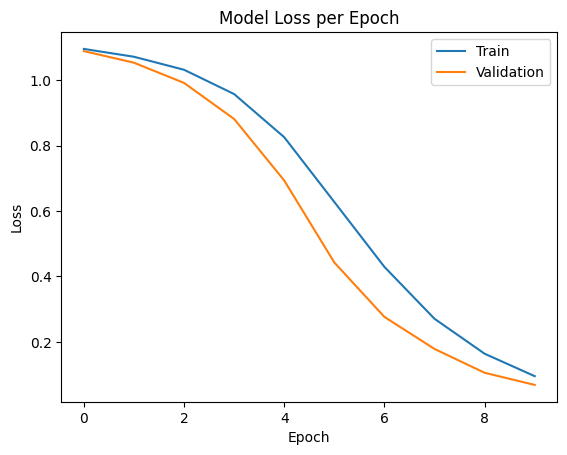

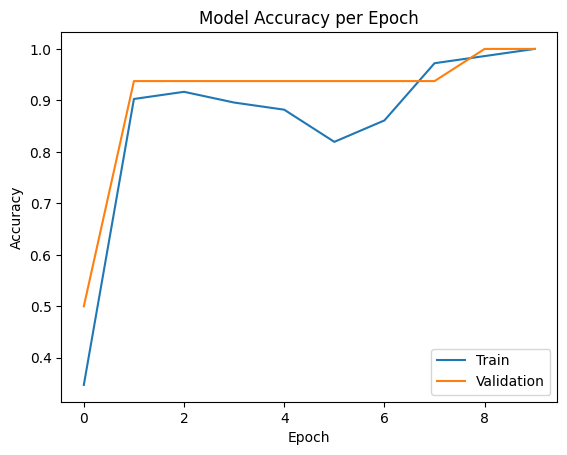

Тест для неромережи: Я дуже задоволений цим днем
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step
Prediction: positive


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import random


positive_templates = [
    'Це чудовий день',
    'Я люблю цей продукт',
    'Враження від фільму були відмінними',
    'Мене тішить результат',
    'Сьогодні все чудово',
    'Я задоволений сервісом',
    'Мені дуже сподобалося',
    'Це найкращий досвід',
    'Відчуваю радість',
    'Неймовірно позитивні емоції'
]

negative_templates = [
    'Я ненавиджу дощ',
    'Мене засмучує ситуація',
    'Немає причин для радості',
    'Я розчарований результатами',
    'Це було жахливо',
    'Надто погано',
    'Я незадоволений сервісом',
    'Це найгірший досвід',
    'Відчуваю злість',
    'Це було напружено'
]

neutral_templates = [
    'Сьогодні як завжди',
    'Все гаразд, нічого особливого',
    'Можливо, щось зміниться',
    'Нічого нового',
    'Просто звичайний день',
    'Ні щасливих, ні сумних подій',
    'Без особливих емоцій',
    'Нічого цікавого',
    'Все стабільно',
    'Помірні відчуття'
]

num_samples = 200
texts, labels = [], []
for _ in range(num_samples):
    label = random.choice(['positive', 'negative', 'neutral'])
    if label == 'positive':
        texts.append(random.choice(positive_templates))
    elif label == 'negative':
        texts.append(random.choice(negative_templates))
    else:
        texts.append(random.choice(neutral_templates))
    labels.append(label)

data = {'text': texts, 'label': labels}
df = pd.DataFrame(data)


label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['label'] = df['label'].map(label_mapping)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
max_len = max(len(s) for s in sequences)
X = pad_sequences(sequences, maxlen=max_len)
y = to_categorical(df['label'].values)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 50

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_len),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(3, activation='softmax')
])
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())


history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=16,
    validation_split=0.1
)


loss, acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {acc*100:.2f}%')


stats_df = pd.DataFrame(history.history)
print("\nTraining history:")
print(stats_df)


plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()


plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()


test_sentence = "Я дуже задоволений цим днем"
print("Тест для неромережи: "+test_sentence)
seq = tokenizer.texts_to_sequences([test_sentence])
seq = pad_sequences(seq, maxlen=max_len)
pred = model.predict(seq)
pred_class = np.argmax(pred, axis=1)[0]
class_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}
print(f'Prediction: {class_mapping[pred_class]}')
